In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [15]:
df = pd.read_csv("/kaggle/input/superstore-sales/Superstore.csv", encoding="latin1")

In [16]:
df.shape

(9994, 21)

In [17]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [20]:
# normalize column names to snake_case
def normalize_col(c):
    return (c.strip().lower()
             .replace(" ", "_")
             .replace("-", "_")
             .replace("/", "_"))

df.columns = [normalize_col(c) for c in df.columns]
print("Columns after normalization:")
print(df.columns.tolist())


Columns after normalization:
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [21]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [23]:

num_cols = []
for col in ["sales", "quantity", "discount", "profit"]:
    if col in df.columns:
        # remove currency signs/commas and convert
        df[col] = (df[col].astype(str)
                        .str.replace(r"[\$,]", "", regex=True)
                        .replace({"": np.nan, "nan": np.nan, "None": np.nan}))
        df[col] = pd.to_numeric(df[col], errors="coerce")
        num_cols.append(col)

print("Converted numeric columns:", num_cols)
display(df[num_cols].head())


Converted numeric columns: ['sales', 'quantity', 'discount', 'profit']


,sales,quantity,discount,profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [27]:
# descriptive stats numeric + sample categorical summaries
print("Numeric summary:")
display(df.select_dtypes(include=[np.number]).describe().T)

print("\nSample categorical summary (first 10 text cols):")
text_cols = df.select_dtypes(include="object").columns.tolist()[:10]
for c in text_cols:
    print(f"\nColumn: {c}  unique={df[c].nunique(dropna=True)}")
    display(df[c].value_counts(dropna=True).head(5))

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
row_id,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
postal_code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976



Sample categorical summary (first 10 text cols):

Column: order_id  unique=5009


order_id
CA-2014-100111    14
CA-2014-157987    12
US-2013-108504    11
CA-2013-165330    11
US-2012-126977    10
Name: count, dtype: int64


Column: ship_mode  unique=4


ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Column: customer_id  unique=793


customer_id
WB-21850    37
JL-15835    34
PP-18955    34
MA-17560    34
SV-20365    32
Name: count, dtype: int64


Column: customer_name  unique=793


customer_name
William Brown    37
John Lee         34
Paul Prost       34
Matt Abelman     34
Seth Vernon      32
Name: count, dtype: int64


Column: segment  unique=3


segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Column: country  unique=1


country
United States    9994
Name: count, dtype: int64


Column: city  unique=531


city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64


Column: state  unique=49


state
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64


Column: region  unique=4


region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


Column: product_id  unique=1862


product_id
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
Name: count, dtype: int64

In [28]:
# frequency of key categorical columns
priority = ["category", "sub_category", "region", "country", "state", "city", "segment", "ship_mode"]
for c in priority:
    if c in df.columns:
        print(f"\nTop values for {c}:")
        display(df[c].value_counts(dropna=True).head(10))


Top values for category:


category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


Top values for sub_category:


sub_category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Name: count, dtype: int64


Top values for region:


region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


Top values for country:


country
United States    9994
Name: count, dtype: int64


Top values for state:


state
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64


Top values for city:


city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64


Top values for segment:


segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Top values for ship_mode:


ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Numeric columns: ['row_id', 'postal_code', 'sales', 'quantity', 'discount', 'profit']


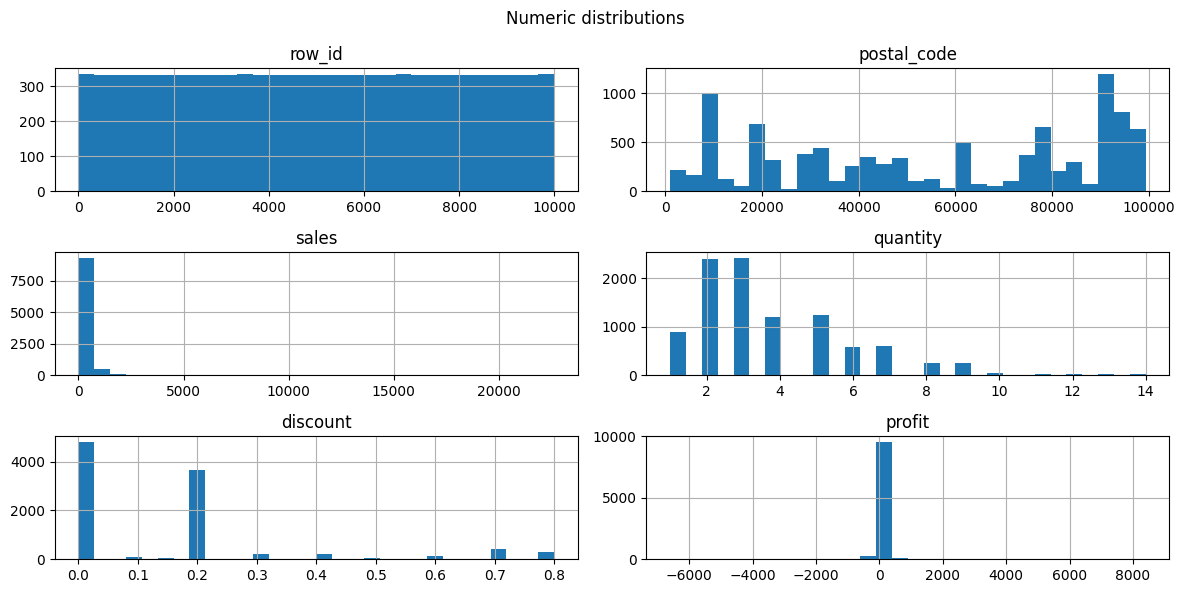

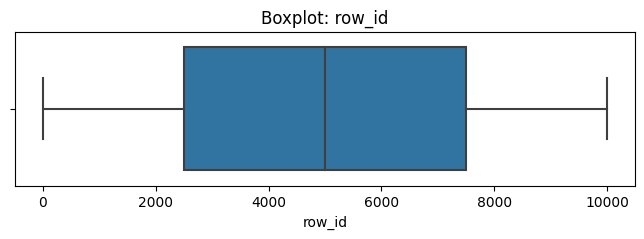

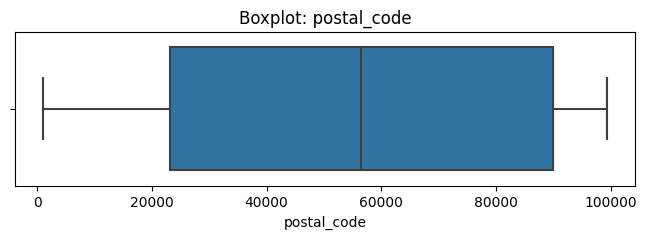

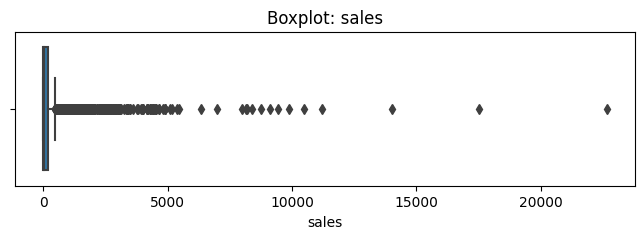

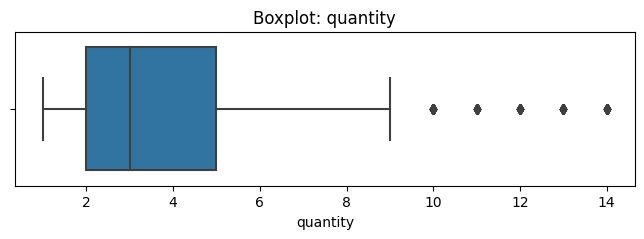

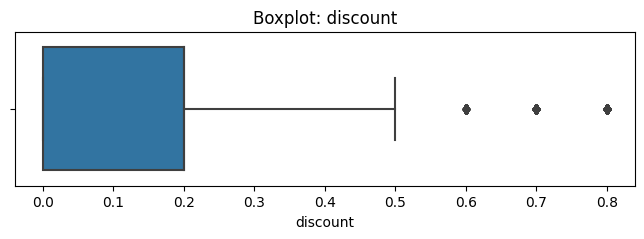

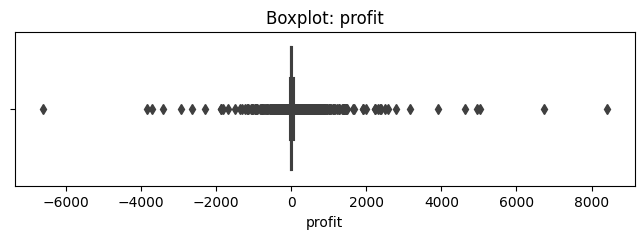

In [30]:
#  histograms and boxplots for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

if num_cols:
    df[num_cols].hist(bins=30, figsize=(12, 6))
    plt.suptitle("Numeric distributions")
    plt.tight_layout()
    plt.show()

    for col in num_cols:
        plt.figure(figsize=(8,2))
        sns.boxplot(x=df[col], orient="h")
        plt.title(f"Boxplot: {col}")
        plt.show()
else:
    print("No numeric columns detected.")


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


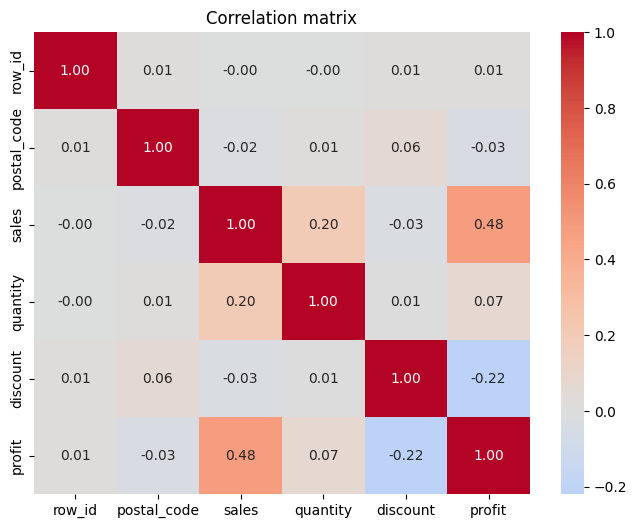

,row_id,postal_code,sales,quantity,discount,profit
row_id,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
postal_code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [31]:
# correlation heatmap (if >=2 numeric cols)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation matrix")
    plt.show()
    display(corr)
else:
    print("Not enough numeric columns for correlations.")

/tmp/ipykernel_48/927436258.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index(order_col).resample("M").agg({"sales":"sum", "profit":"sum", "quantity":"sum"})


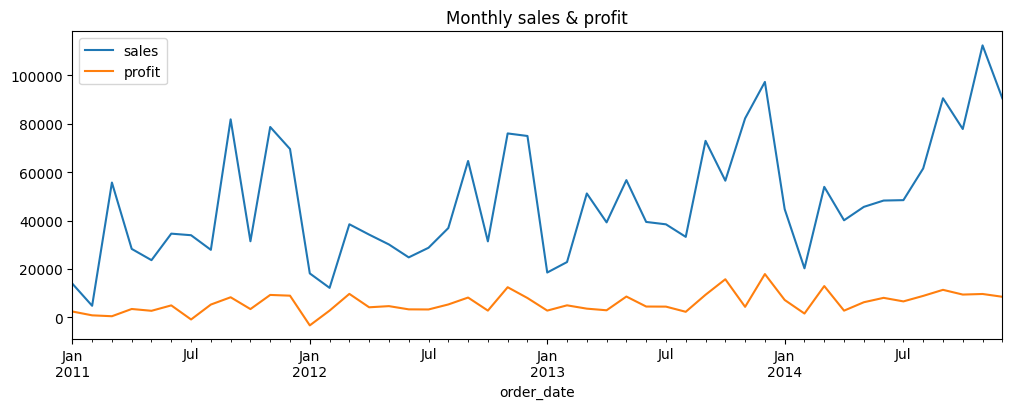

,sales,profit,quantity
order_date,,,
2011-01-31,13946.229,2446.7711,282
2011-02-28,4810.558,865.7280,161
2011-03-31,55691.009,498.7299,585
2011-04-30,28295.345,3488.8352,536
2011-05-31,23648.287,2738.7096,466


In [32]:
#  monthly trend for sales & profit
order_col = next((c for c in df.columns if "order" in c and "date" in c), None)
if order_col and np.issubdtype(df[order_col].dtype, np.datetime64) and "sales" in df.columns:
    ts = df.set_index(order_col).resample("M").agg({"sales":"sum", "profit":"sum", "quantity":"sum"})
    ts = ts.fillna(0)
    plt.figure(figsize=(12,4))
    ts[["sales","profit"]].plot(ax=plt.gca(), title="Monthly sales & profit")
    plt.show()
    display(ts.head())
else:
    print("Order date not found or not parsed, or sales column missing.")


In [33]:
#top products, top customers, region/state summaries
if "product_name" in df.columns and "sales" in df.columns:
    top_products = (df.groupby("product_name")
                      .agg(total_sales = ("sales","sum"),
                           total_qty   = ("quantity","sum"),
                           total_profit= ("profit","sum"),
                           orders      = ("product_name","count"))
                      .sort_values("total_sales", ascending=False))
    print("Top 10 products by sales:")
    display(top_products.head(10))

if "customer_name" in df.columns:
    top_customers = (df.groupby("customer_name")
                      .agg(total_sales = ("sales","sum"),
                           total_profit= ("profit","sum"),
                           orders      = ("customer_name","count"))
                      .sort_values("total_sales", ascending=False))
    print("Top 10 customers by sales:")
    display(top_customers.head(10))

for group_col in ["region","state"]:
    if group_col in df.columns:
        summary = (df.groupby(group_col)
                     .agg(total_sales=("sales","sum"),
                          total_profit=("profit","sum"),
                          orders=("sales","count"))
                     .sort_values("total_sales", ascending=False))
        print(f"Top {group_col} by sales (top 10):")
        display(summary.head(10))

Top 10 products by sales:


,total_sales,total_qty,total_profit,orders
product_name,,,,
Canon imageCLASS 2200 Advanced Copier,61599.824,20,2.519993e+04,5
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,31,7.753039e+03,10
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,6,-1.811078e+03,1
HON 5400 Series Task Chairs for Big and Tall,21870.576,39,5.684342e-14,8
GBC DocuBind TL300 Electric Binding System,19823.479,37,2.233505e+03,11
GBC Ibimaster 500 Manual ProClick Binding System,19024.500,48,7.609800e+02,9
Hewlett Packard LaserJet 3310 Copier,18839.686,38,6.983884e+03,8
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,12,4.094977e+03,3
GBC DocuBind P400 Electric Binding System,17965.068,27,-1.878166e+03,6


Top 10 customers by sales:


,total_sales,total_profit,orders
customer_name,,,
Sean Miller,25043.050,-1980.7393,15
Tamara Chand,19052.218,8981.3239,12
Raymond Buch,15117.339,6976.0959,18
Tom Ashbrook,14595.620,4703.7883,10
Adrian Barton,14473.571,5444.8055,20
Ken Lonsdale,14175.229,806.8550,29
Sanjit Chand,14142.334,5757.4119,22
Hunter Lopez,12873.298,5622.4292,11
Sanjit Engle,12209.438,2650.6769,19


Top region by sales (top 10):


,total_sales,total_profit,orders
region,,,
West,725457.8245,108418.4489,3203
East,678781.2400,91522.7800,2848
Central,501239.8908,39706.3625,2323
South,391721.9050,46749.4303,1620


Top state by sales (top 10):


,total_sales,total_profit,orders
state,,,
California,457687.6315,76381.3871,2001
New York,310876.2710,74038.5486,1128
Texas,170188.0458,-25729.3563,985
Washington,138641.2700,33402.6517,506
Pennsylvania,116511.9140,-15559.9603,587
Florida,89473.7080,-3399.3017,383
Illinois,80166.1010,-12607.8870,492
Ohio,78258.1360,-16971.3766,469
Michigan,76269.6140,24463.1876,255


In [34]:
# analyze orders with negative profit
if "profit" in df.columns:
    neg = df[df["profit"] < 0]
    print("Negative profit row count:", len(neg))
    if len(neg) > 0:
        display(neg.head(10))
        # look at top categories causing losses
        for c in ["category","sub_category","ship_mode","region"]:
            if c in neg.columns:
                print(f"\nLosses by {c}:")
                display(neg[c].value_counts().head(10))
else:
    print("No profit column present.")

Negative profit row count: 1871


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2012-118983,2012-11-22,2012-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2012-118983,2012-11-22,2012-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2014-156909,2014-07-17,2014-07-19,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2012-150630,2012-09-17,2012-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
28,29,US-2012-150630,2012-09-17,2012-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.6180,2,0.70,-7.0532
32,33,US-2012-150630,2012-09-17,2012-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.8580,6,0.70,-5.7150
36,37,CA-2013-117590,2013-12-09,2013-12-11,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
38,39,CA-2012-117415,2012-12-27,2012-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
39,40,CA-2012-117415,2012-12-27,2012-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.0580,3,0.30,-15.1470



Losses by category:


category
Office Supplies    886
Furniture          714
Technology         271
Name: count, dtype: int64


Losses by sub_category:


sub_category
Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Name: count, dtype: int64


Losses by ship_mode:


ship_mode
Standard Class    1173
Second Class       307
First Class        293
Same Day            98
Name: count, dtype: int64


Losses by region:


region
Central    741
East       553
West       318
South      259
Name: count, dtype: int64